In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import urllib.request
from tqdm import tqdm
import pandas as pd

%matplotlib inline

In [219]:
# Cost funcions

def OneMax(P):
    return P.sum(axis=1)


def DeceptiveOneMax(P):
    N, d = P.shape
    s = P.sum(axis=1)
    s[s == 0] = d + 1
    return s


def K_DeceptiveOneMax(P, k=5):
    N, d = P.shape
    s = np.zeros(N)
 
    for j in range(k, d + 1, k):
        tmp = P[:, j - k: j].sum(axis=1)
        tmp[tmp == 0] = k + 1
        s += tmp

    return s

In [174]:
class PBIL:
    def __init__(self, cost_f, d, N, T1, T2, T3, iters=1000):
        self.cost_f = cost_f
        self.d = d
        self.N = N
        self.Theta1 = T1
        self.Theta2 = T2
        self.Theta3 = T3
        self.iters = iters
        self.scores = []
        self.ps = []
        
        self.p = np.ones(self.d) / 2
        self.P = np.random.rand(self.N, self.d) < self.p
        self.cost = self.cost_f(self.P)
       
    
    def run(self):
        for i in tqdm(range(self.iters), desc='PBIL', position=0):
            best = self.P[np.argmax(self.cost)]
            self.p = self.p * (1 - self.Theta1) + best * self.Theta1
            
            self.p = np.array([self.p[i] * (1 - self.Theta3) + (np.random.rand() < 0.5) * self.Theta3 
                               if np.random.rand() < self.Theta2 
                               else self.p[i] 
                               for i in range(self.d)])
            
            self.P = np.random.rand(self.N, self.d) < self.p
            self.cost = self.cost_f(self.P)
            
            self.ps.append(self.p)
            self.scores.append([self.cost.max(), self.cost.mean(), self.cost.min()])
            
            
    def plot_res(self, title=''):
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        fig.suptitle(title)
        
        ax[0].plot(np.arange(self.iters), np.array(self.scores)[:, 0], color='green', label='Best')
        ax[0].plot(np.arange(self.iters), np.array(self.scores)[:, 1], color='blue', label='Average')
        ax[0].plot(np.arange(self.iters), np.array(self.scores)[:, 2], color='red', label='Worst')
        ax[0].legend(loc='lower right')
        ax[0].set_title('Cost function')

        ax[1].plot(np.arange(self.iters), np.array(self.ps))
        ax[1].set_title('Probabilities')
        
        plt.show()

PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 4212.45it/s]


Best: 100.0


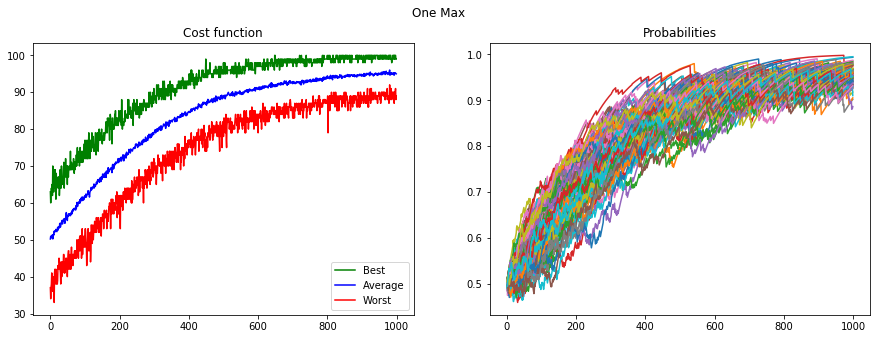

Wall time: 615 ms


In [235]:
%%time
pbil = PBIL(cost_f=OneMax, d=100, N=100, T1=0.01, T2=0.05, T3=0.02, iters=1000)
pbil.run()
print(f'Best: {np.array(pbil.scores)[:, 0].max()}')
pbil.plot_res('One Max')

PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5167.65it/s]


Best: 100.0


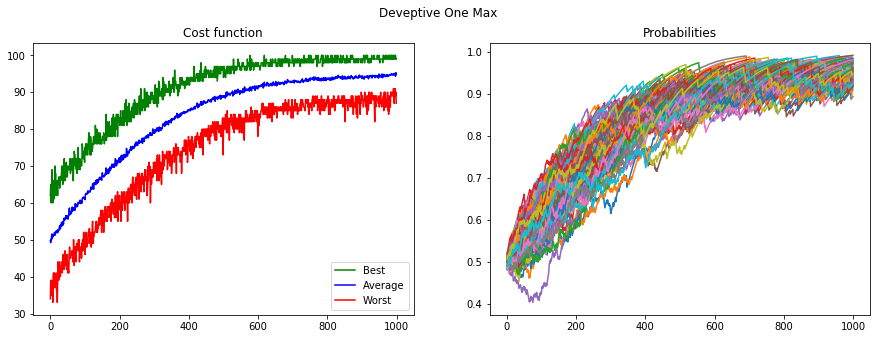

Wall time: 569 ms


In [231]:
%%time
pbil = PBIL(cost_f=DeceptiveOneMax, d=100, N=100, T1=0.01, T2=0.05, T3=0.02, iters=1000)
pbil.run()
print(f'Best: {np.array(pbil.scores)[:, 0].max()}')
pbil.plot_res('Deveptive One Max')

PBIL: 100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 719.33it/s]


Best: 101.0


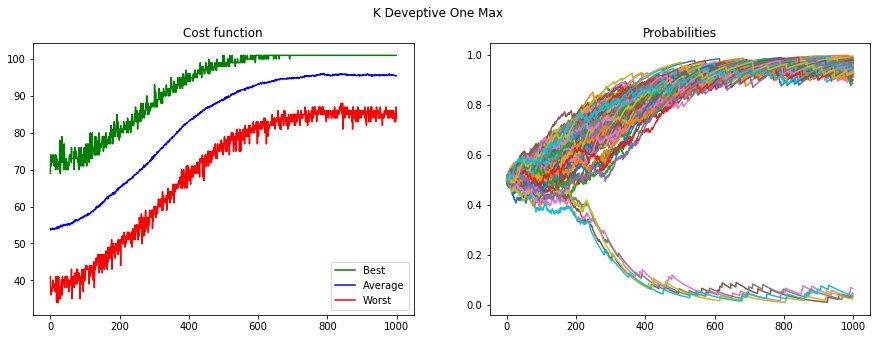

Wall time: 1.75 s


In [249]:
%%time
pbil = PBIL(cost_f=K_DeceptiveOneMax, d=100, N=1000, T1=0.01, T2=0.05, T3=0.02, iters=1000)
pbil.run()
print(f'Best: {np.array(pbil.scores)[:, 0].max()}')
pbil.plot_res('K Deveptive One Max')

# Different parameters

PBIL: 100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 20876.22it/s]


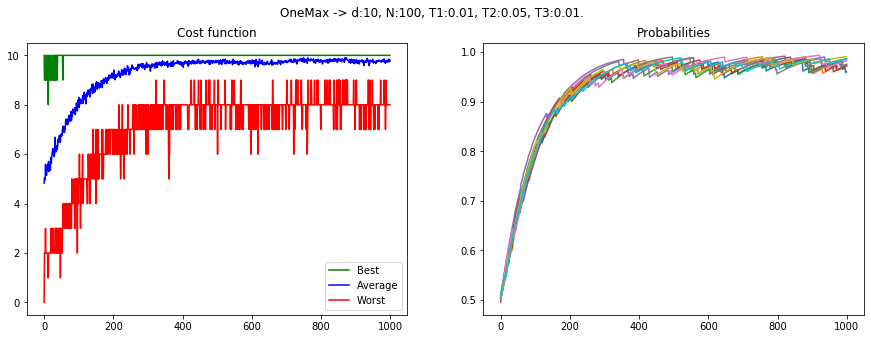

PBIL: 100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 17287.40it/s]


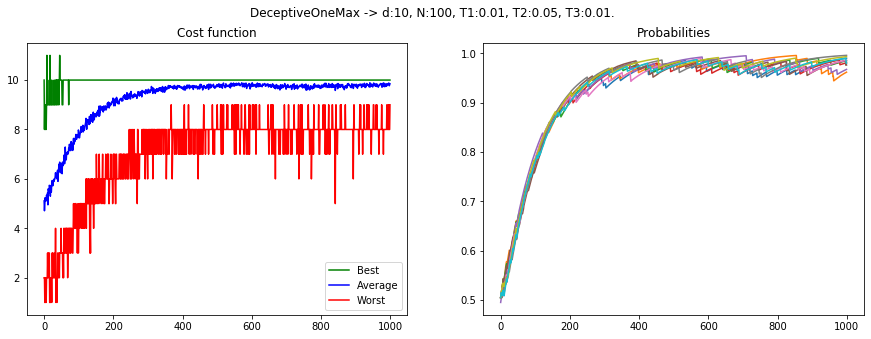

PBIL: 100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 15915.55it/s]


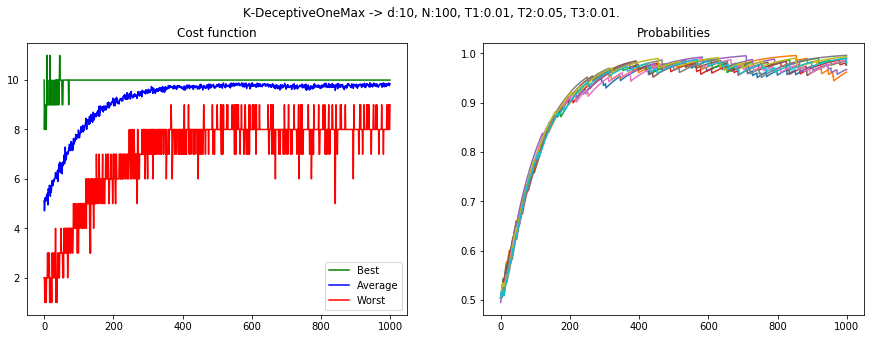

Scores: 10.0, 11.0, 12.0 / (d: 10)



PBIL: 100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 21333.55it/s]


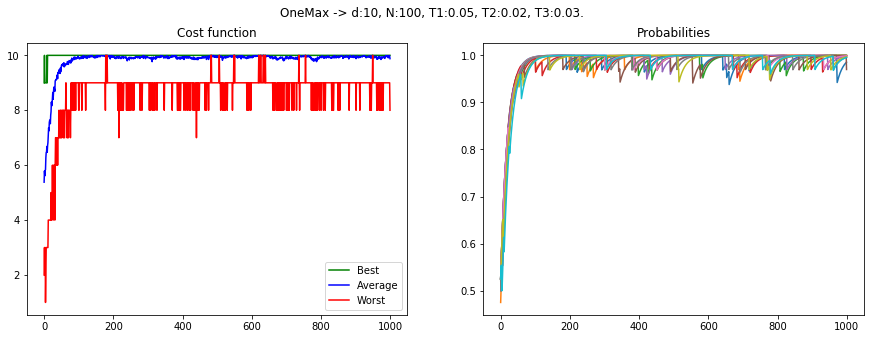

PBIL: 100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 19660.37it/s]


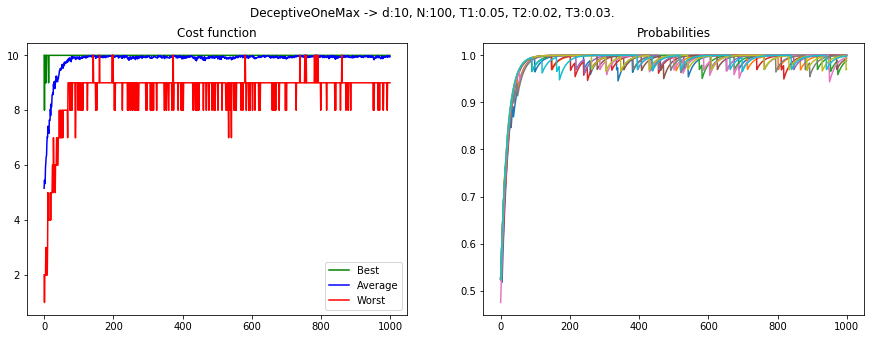

PBIL: 100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 16420.30it/s]


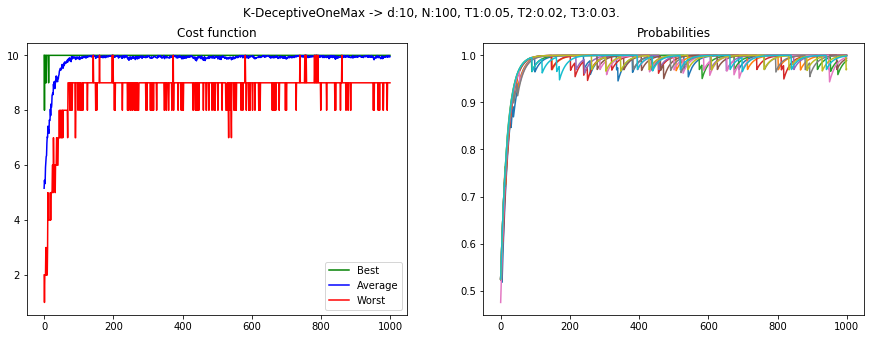

Scores: 10.0, 10.0, 12.0 / (d: 10)



PBIL: 100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 21333.66it/s]


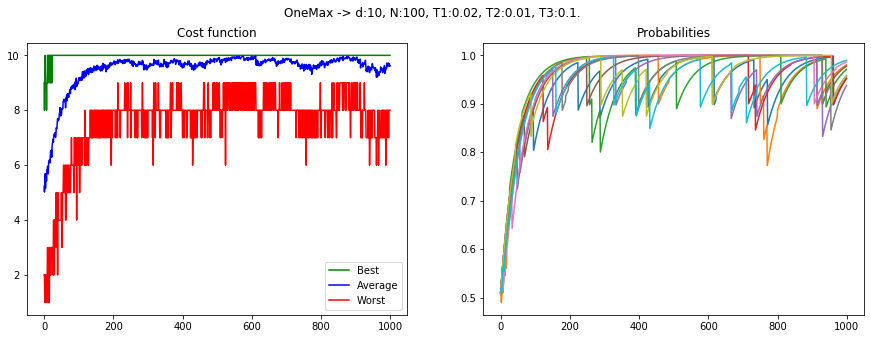

PBIL: 100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 20876.95it/s]


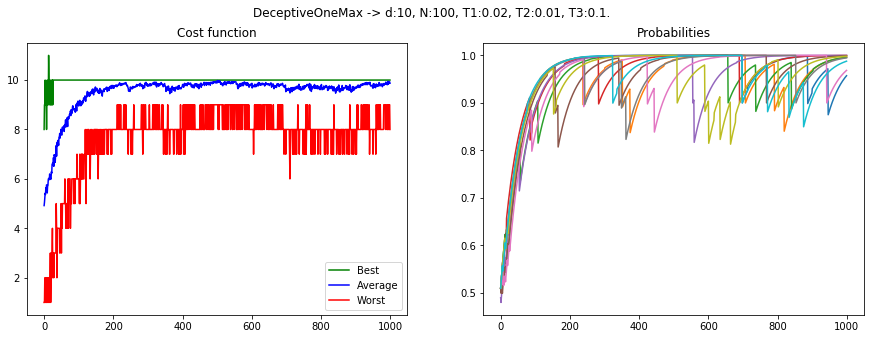

PBIL: 100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 16164.89it/s]


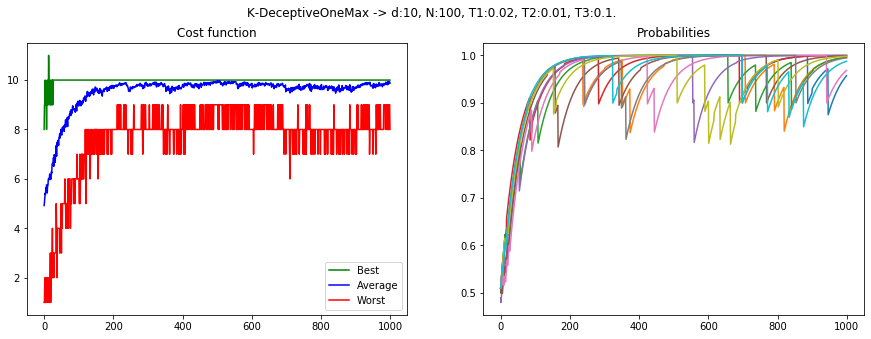

Scores: 10.0, 11.0, 12.0 / (d: 10)



PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7109.76it/s]


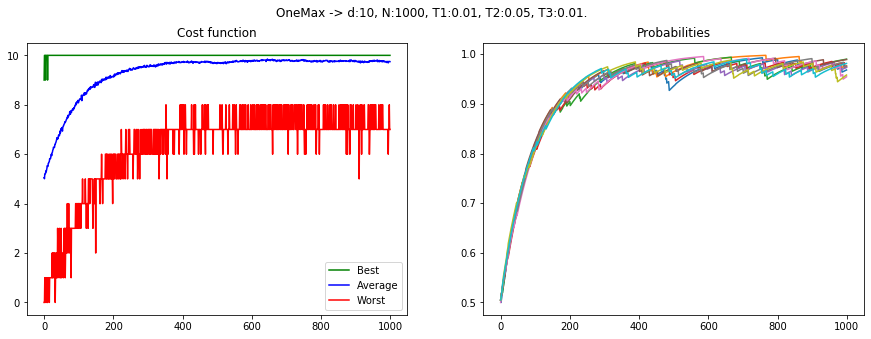

PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6478.69it/s]


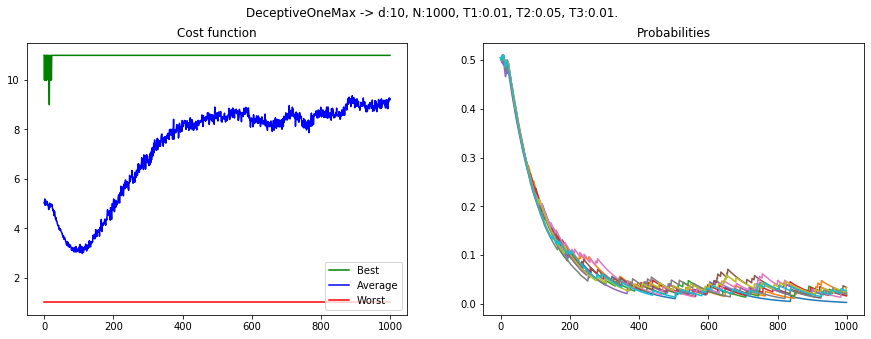

PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5522.76it/s]


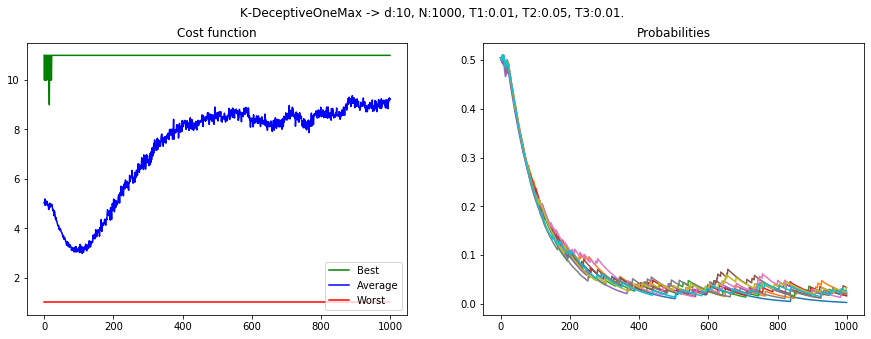

Scores: 10.0, 11.0, 12.0 / (d: 10)



PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7060.98it/s]


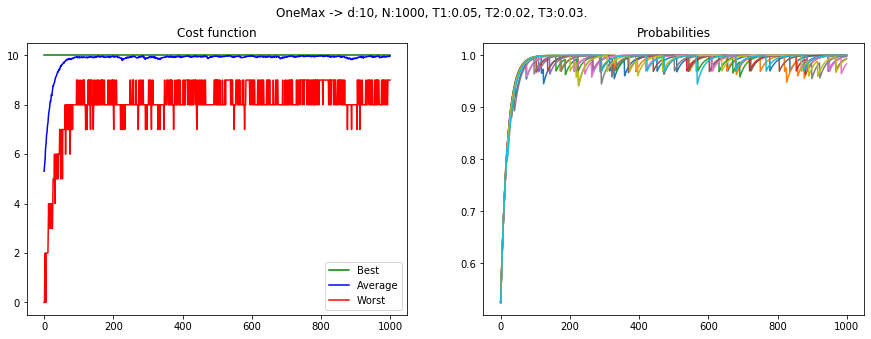

PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6639.03it/s]


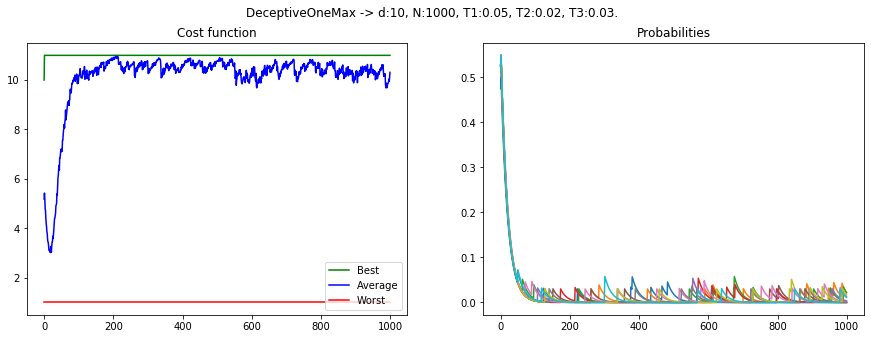

PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5450.14it/s]


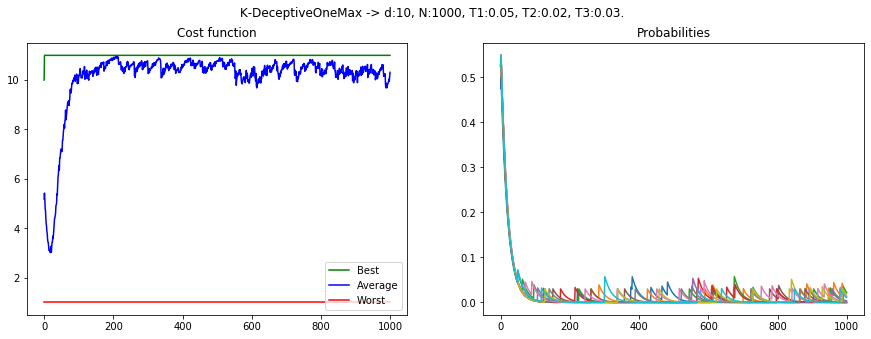

Scores: 10.0, 11.0, 12.0 / (d: 10)



PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6794.49it/s]


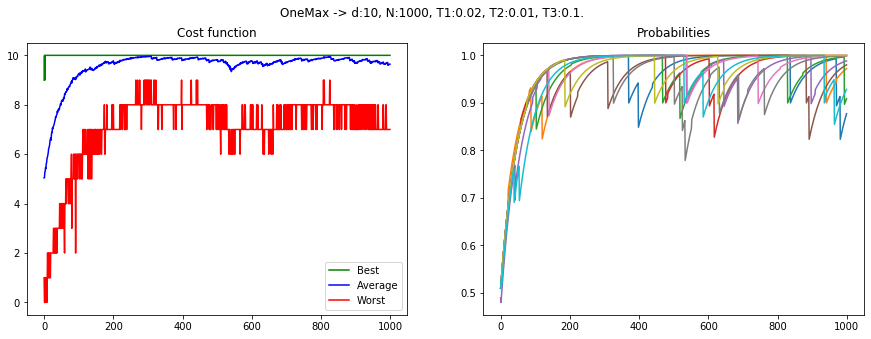

PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6511.18it/s]


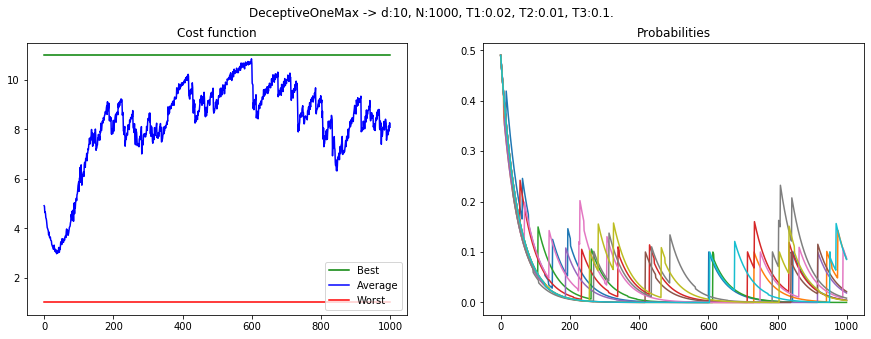

PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5538.76it/s]


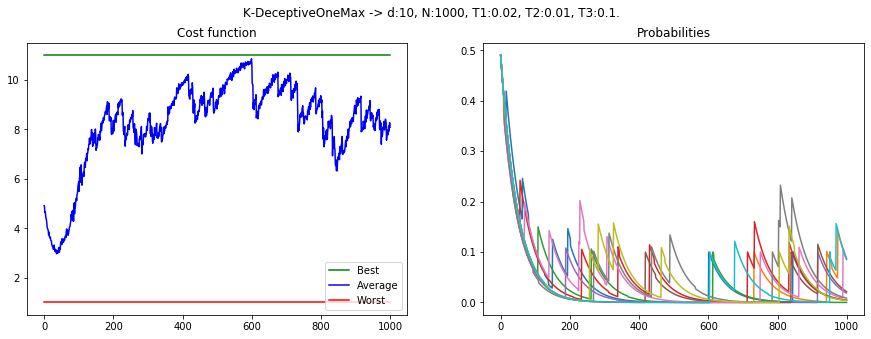

Scores: 10.0, 11.0, 12.0 / (d: 10)



PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5374.47it/s]


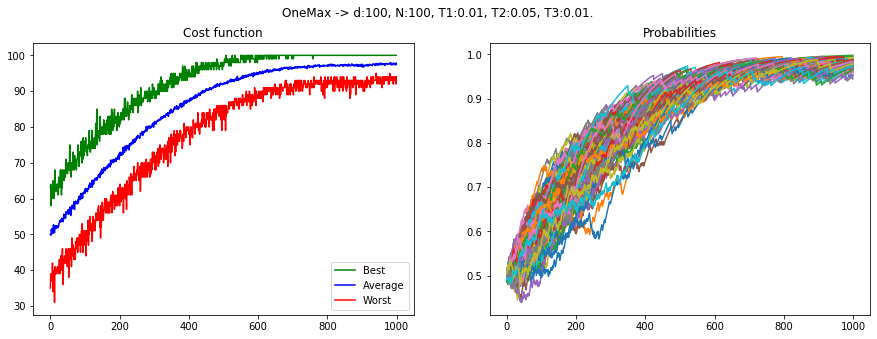

PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5245.60it/s]


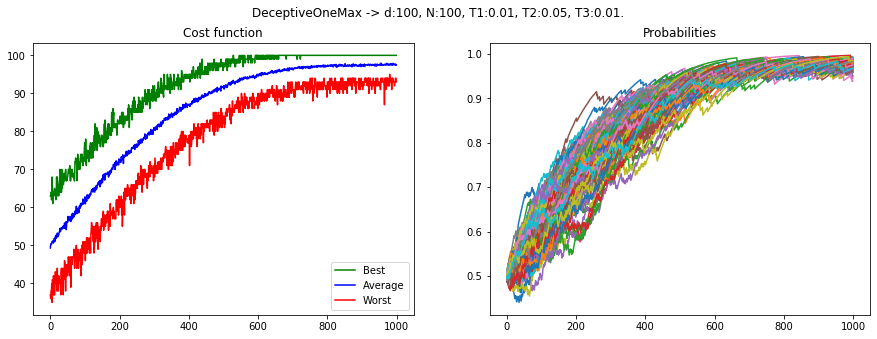

PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 3020.11it/s]


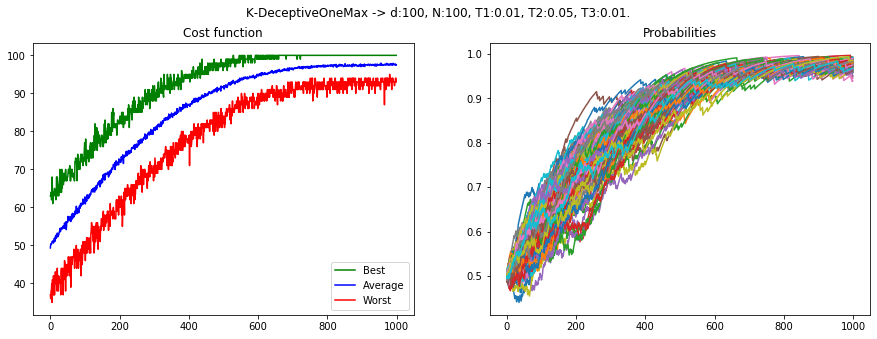

Scores: 100.0, 100.0, 100.0 / (d: 100)



PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5276.77it/s]


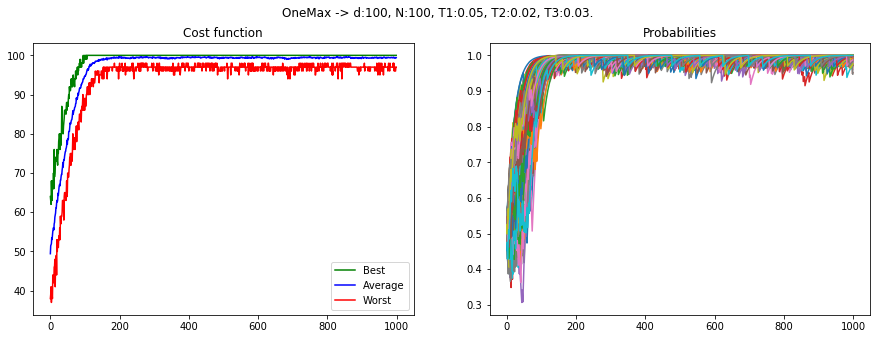

PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5294.11it/s]


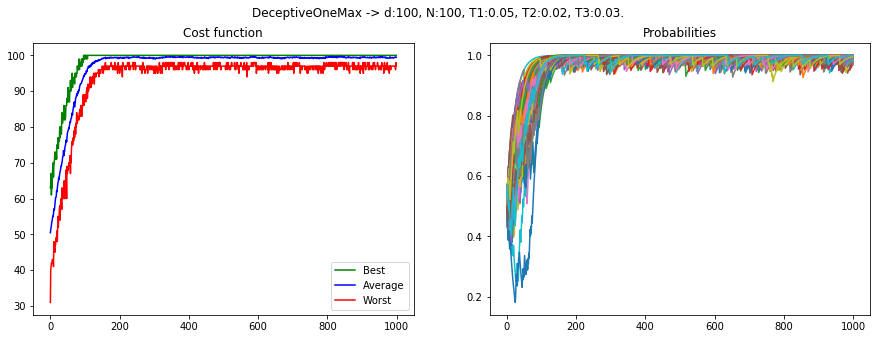

PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2897.67it/s]


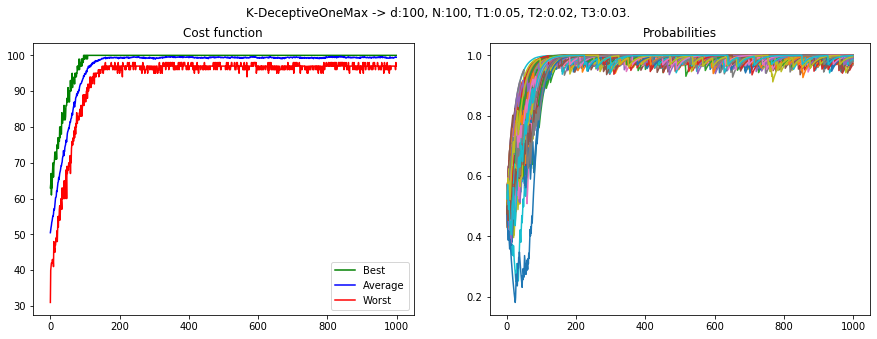

Scores: 100.0, 100.0, 102.0 / (d: 100)



PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5114.11it/s]


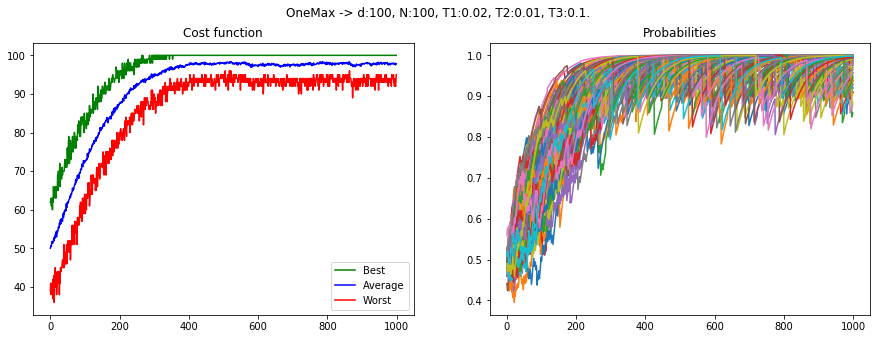

PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5142.63it/s]


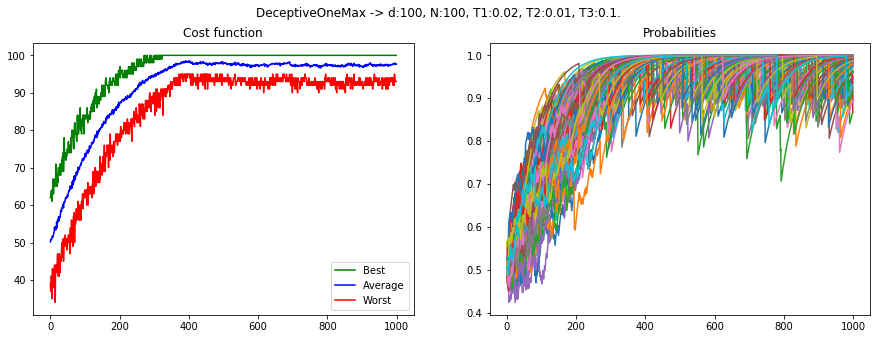

PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 3037.50it/s]


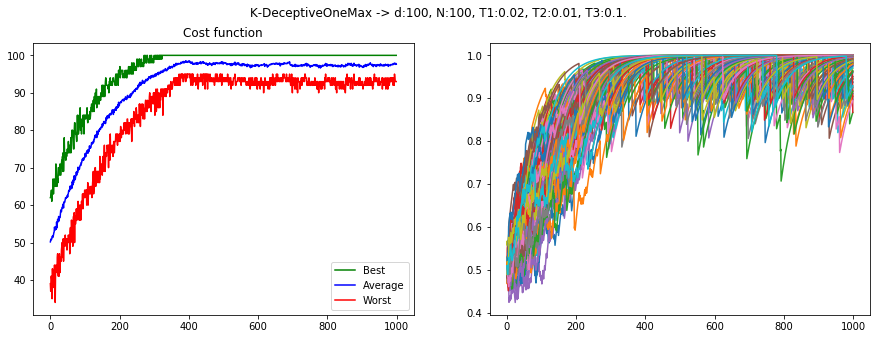

Scores: 100.0, 100.0, 100.0 / (d: 100)



PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1052.12it/s]


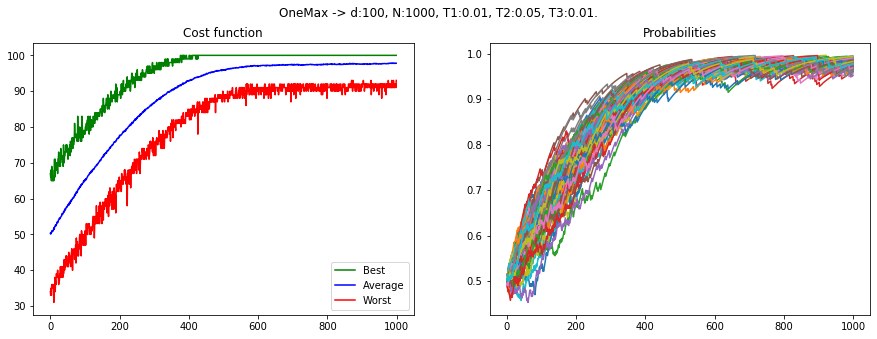

PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1053.27it/s]


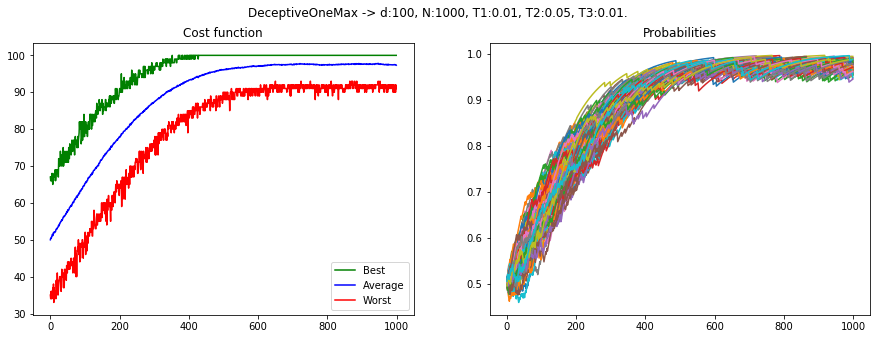

PBIL: 100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 743.05it/s]


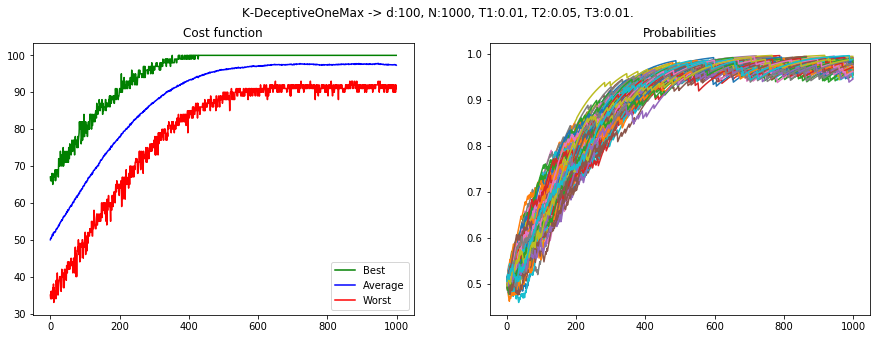

Scores: 100.0, 100.0, 100.0 / (d: 100)



PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1070.38it/s]


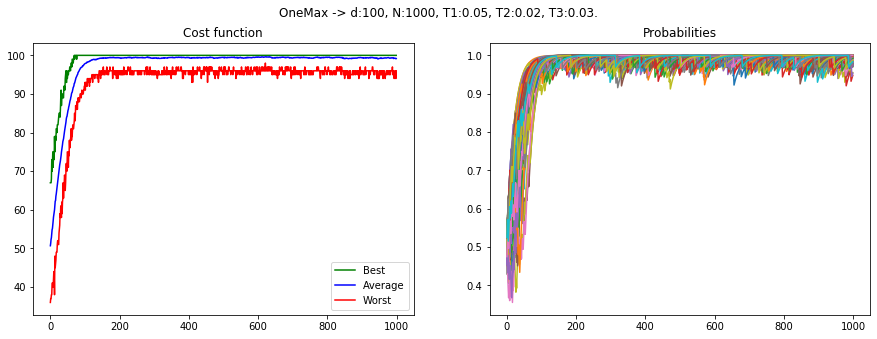

PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1042.71it/s]


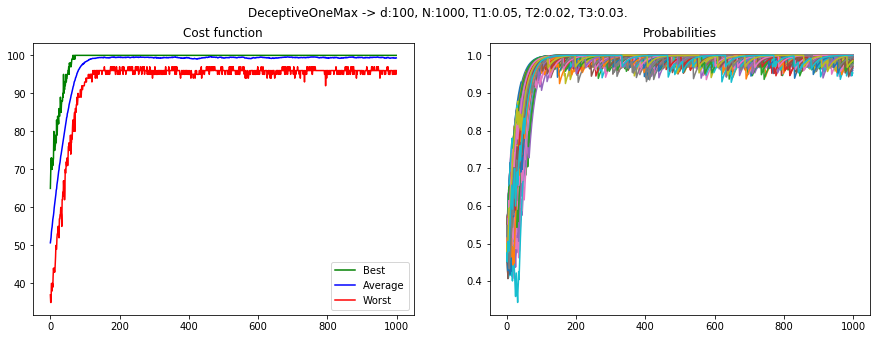

PBIL: 100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 725.30it/s]


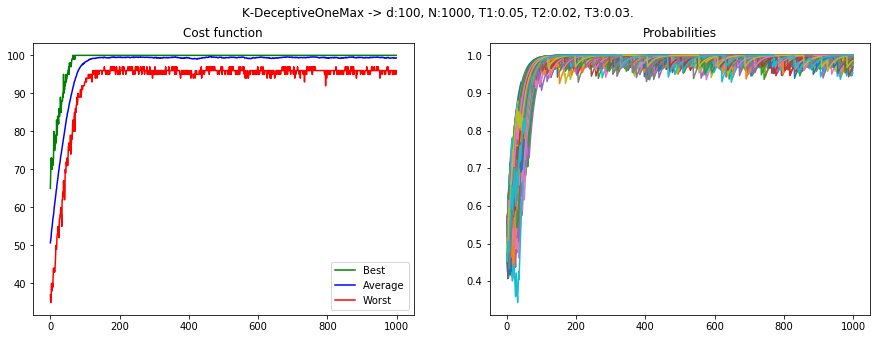

Scores: 100.0, 100.0, 103.0 / (d: 100)



PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1052.13it/s]


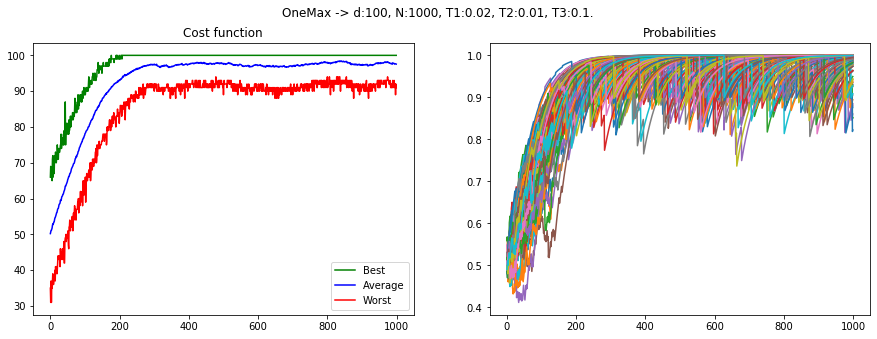

PBIL: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1059.63it/s]


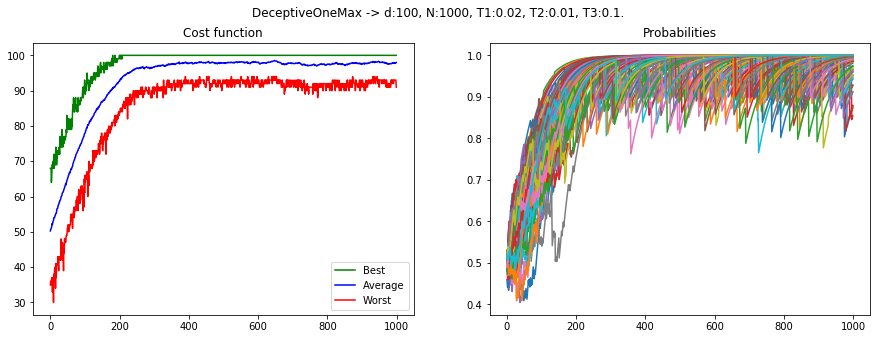

PBIL: 100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 738.36it/s]


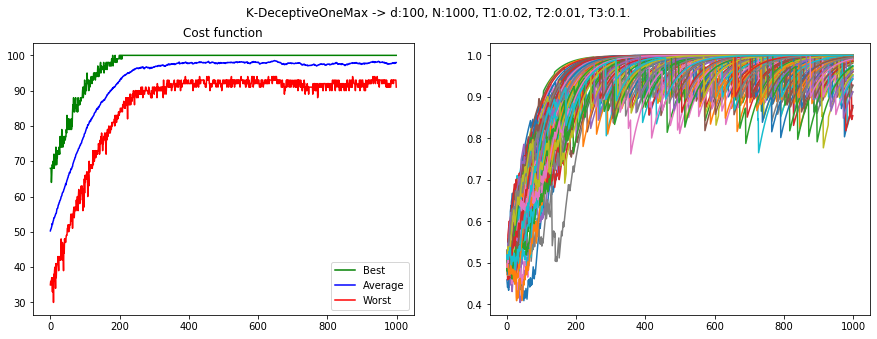

Scores: 100.0, 100.0, 102.0 / (d: 100)



PBIL: 100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 625.64it/s]


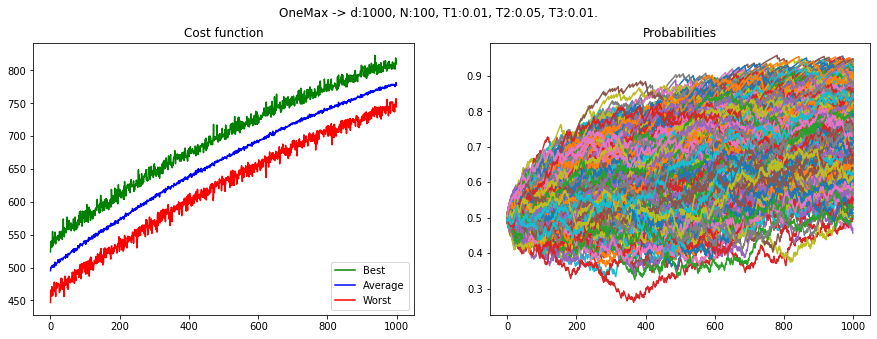

PBIL: 100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 618.29it/s]


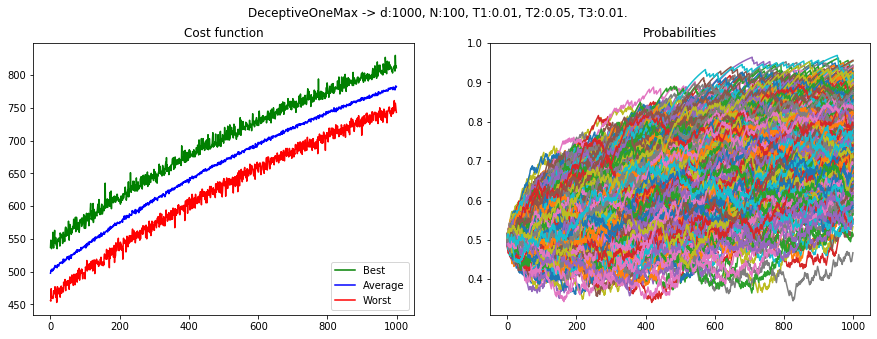

PBIL: 100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 317.80it/s]


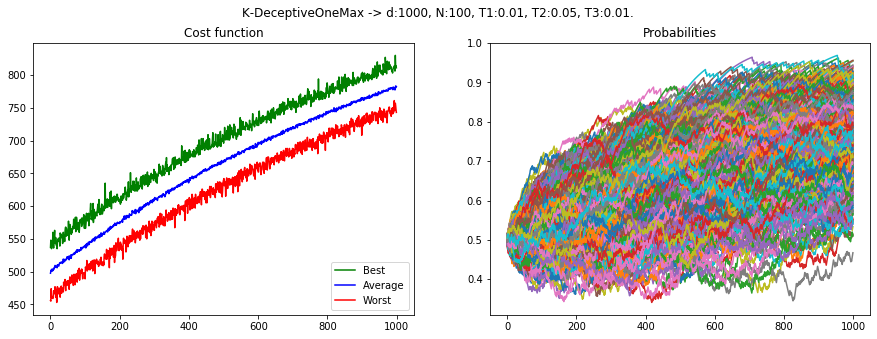

Scores: 823.0, 830.0, 783.0 / (d: 1000)



PBIL: 100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 645.97it/s]


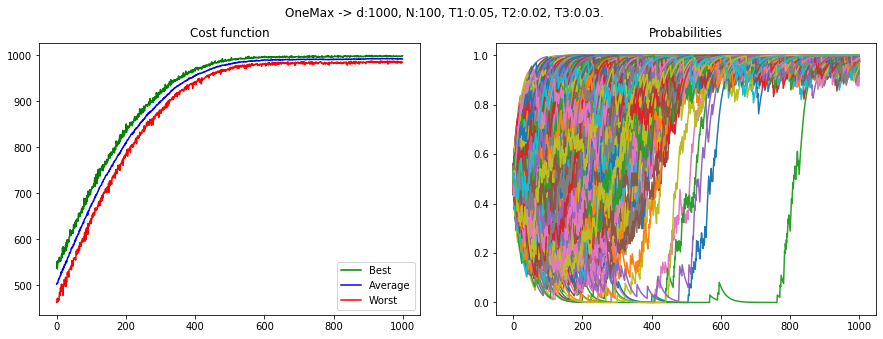

PBIL: 100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 653.90it/s]


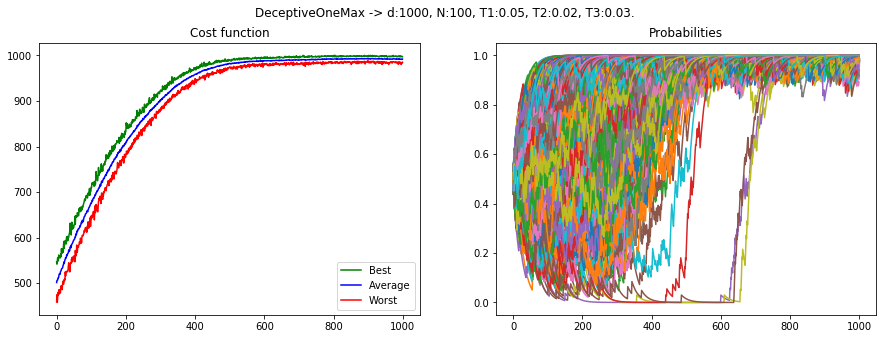

PBIL: 100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 337.88it/s]


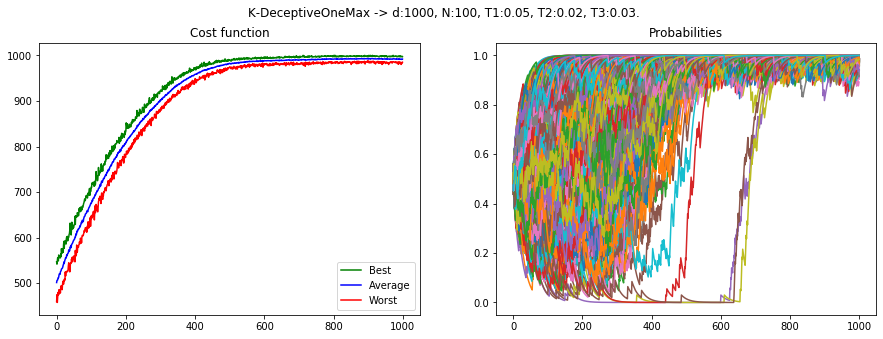

Scores: 1000.0, 1000.0, 1006.0 / (d: 1000)



PBIL: 100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 621.71it/s]


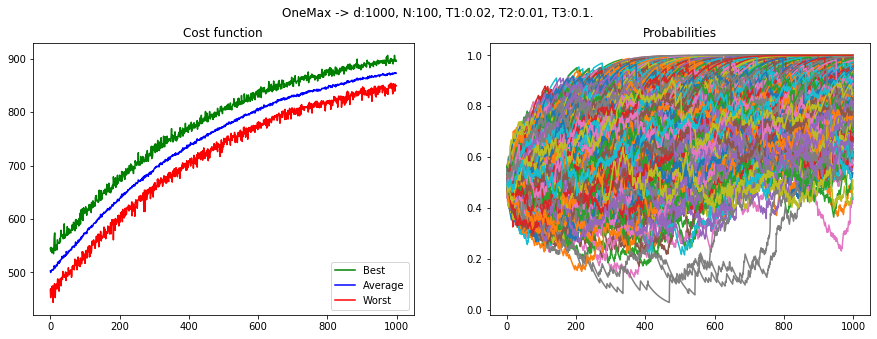

PBIL: 100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 650.70it/s]


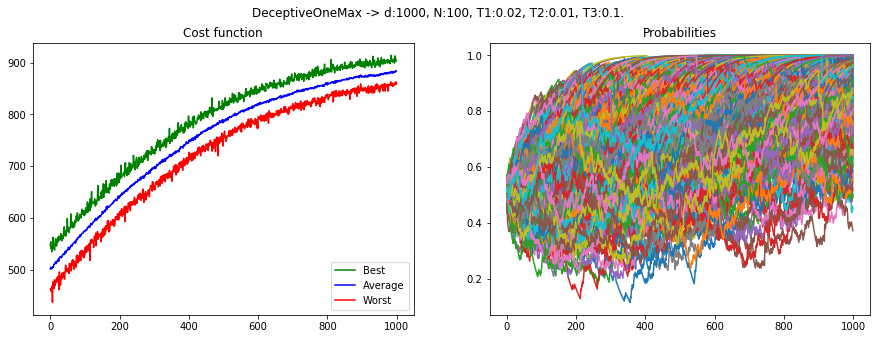

PBIL: 100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 338.04it/s]


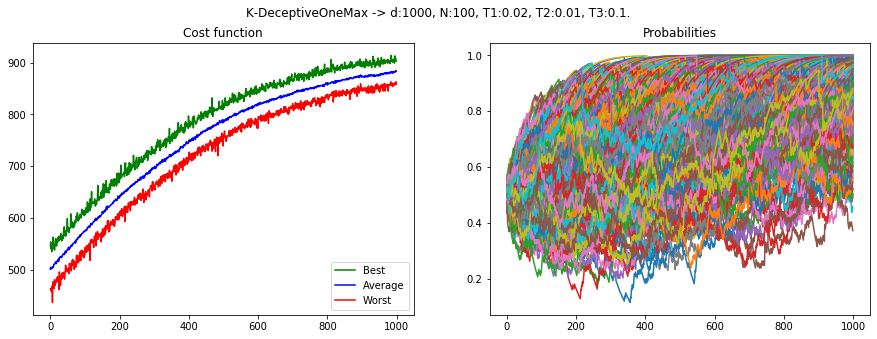

Scores: 906.0, 914.0, 901.0 / (d: 1000)



PBIL: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.61it/s]


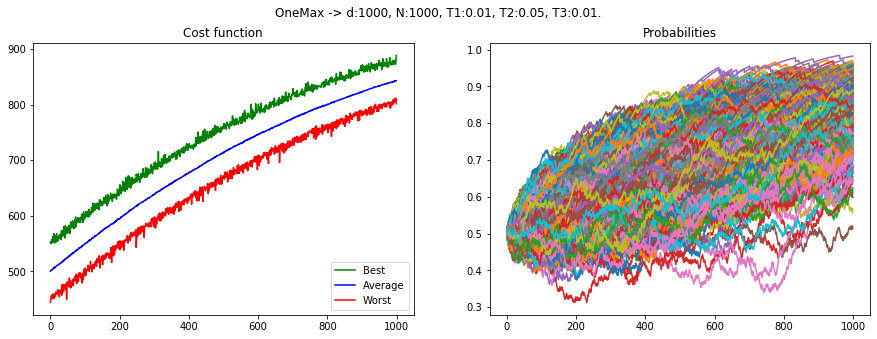

PBIL: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.30it/s]


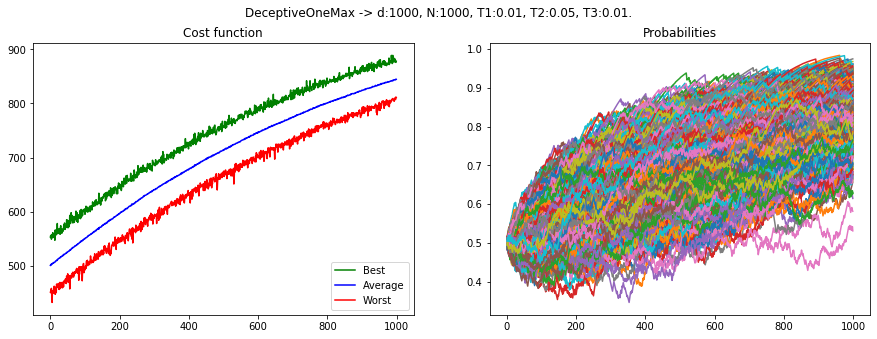

PBIL: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.06it/s]


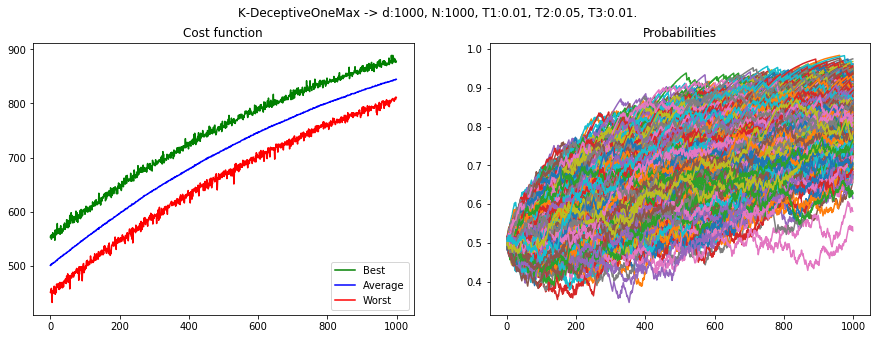

Scores: 889.0, 889.0, 862.0 / (d: 1000)



PBIL: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.66it/s]


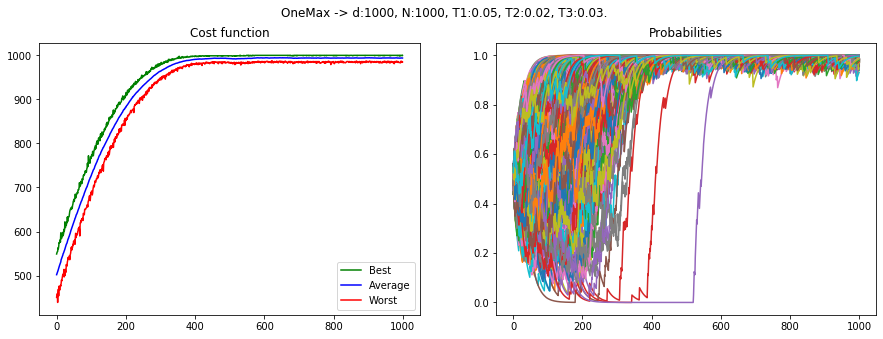

PBIL: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 83.50it/s]


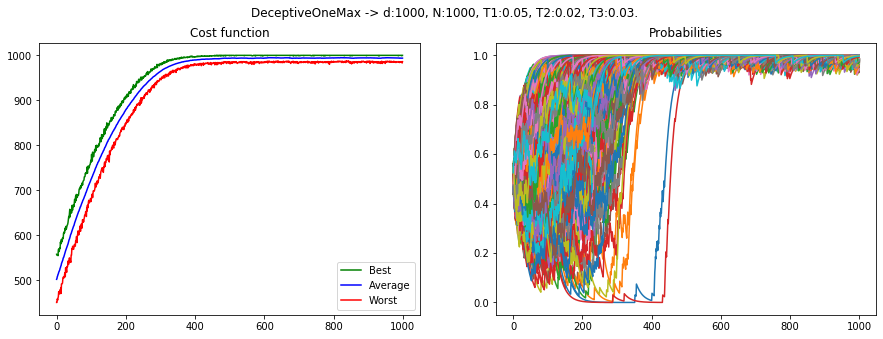

PBIL: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.31it/s]


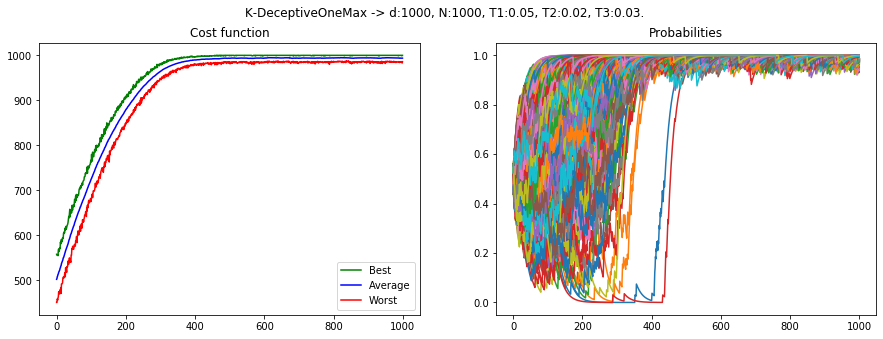

Scores: 1000.0, 1000.0, 1015.0 / (d: 1000)



PBIL: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.20it/s]


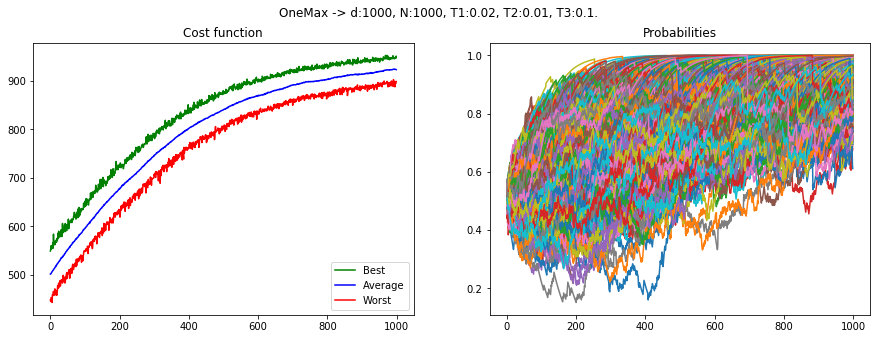

PBIL: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.88it/s]


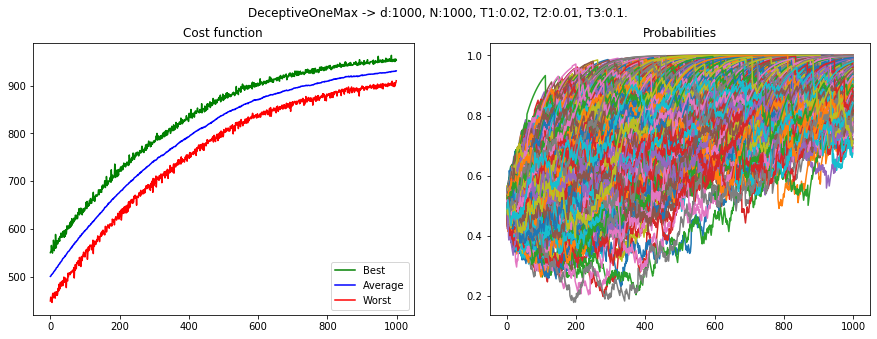

PBIL: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.96it/s]


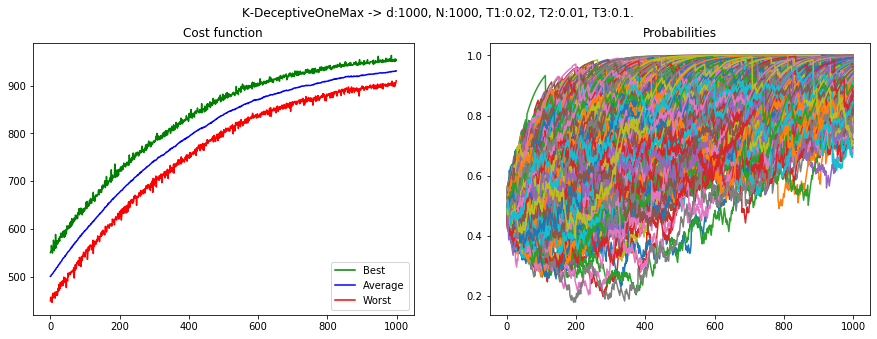

Scores: 953.0, 963.0, 947.0 / (d: 1000)

Wall time: 3min 15s


In [250]:
%%time

ds = [10, 100, 1000]
Ns = [100, 1000]
Thetas = [(0.01, 0.05, 0.01), (0.05, 0.02, 0.03), (0.02, 0.01, 0.1)]
SCORES = []

for d in ds:
    for N in Ns:
        for T1, T2, T3 in Thetas:
            pbil1 = PBIL(cost_f=OneMax, d=d, N=N, T1=T1, T2=T2, T3=T3, iters=1000)
            pbil1.run()
            pbil1.plot_res(f'OneMax -> d:{d}, N:{N}, T1:{T1}, T2:{T2}, T3:{T3}.')
            
            pbil2 = PBIL(cost_f=DeceptiveOneMax, d=d, N=N, T1=T1, T2=T2, T3=T3, iters=1000)
            pbil2.run()
            pbil2.plot_res(f'DeceptiveOneMax -> d:{d}, N:{N}, T1:{T1}, T2:{T2}, T3:{T3}.')
            
            pbil3 = PBIL(cost_f=K_DeceptiveOneMax, d=d, N=N, T1=T1, T2=T2, T3=T3, iters=1000)
            pbil3.run()
            pbil2.plot_res(f'K-DeceptiveOneMax -> d:{d}, N:{N}, T1:{T1}, T2:{T2}, T3:{T3}.')
            b1, b2, b3 = np.array(pbil1.scores)[:, 0].max(), np.array(pbil2.scores)[:, 0].max(), np.array(pbil3.scores)[:, 0].max()
            print(f'Scores: {b1}, {b2}, {b3} / (d: {d})\n')
            SCORES.append((pbil1.scores, pbil2.scores, pbil3.scores))